In [1]:
from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage,OdaLightCurve
from oda_api.data_products import BinaryData
import os
from astropy.io import fits
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
source_name='3C 279'
ra=194.046527
dec=-5.789314
radius=10.
Tstart='2003-03-15T00:00:00'
Tstop='2018-03-15T00:00:00'
E1_keV=30.
E2_keV=100.
host='www.astro.unige.ch/cdci/astrooda/dispatch-data'
rebin=10 # minimal significance in energy bin, for spectral plotting

In [4]:
token=input() # token for restricted access server
cookies=dict(_oauth2_proxy=token)

In [5]:
disp=DispatcherAPI(host=host,cookies=cookies,protocol='https')

In [7]:
import requests
url="https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/api/v1.0/scwlist/cons/"
def queryxtime(**args):
    params=Tstart+'/'+Tstop+'?&ra='+str(ra)+'&dec='+str(dec)+'&radius='+str(radius)+'&min_good_isgri=1000'
    print(url+params)
    return requests.get(url+params,cookies=cookies).json()

In [8]:
#if token!='':
scwlist=queryxtime()
m=len(scwlist)
pointings_osa10=[]
pointings_osa11=[]
for i in range(m):
    if scwlist[i][-2:]=='10':
        if(int(scwlist[i][:4])<1626):
            pointings_osa10.append(scwlist[i]+'.001')
        else:
            pointings_osa11.append(scwlist[i]+'.001')
#else:
#    pointings=np.genfromtxt('scws_3C279_isgri_10deg.txt', dtype='str')
m_osa10=len(pointings_osa10)
m_osa11=len(pointings_osa11)

https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/api/v1.0/scwlist/cons/2003-03-15T00:00:00/2018-03-15T00:00:00?&ra=194.046527&dec=-5.789314&radius=10.0&min_good_isgri=1000


In [9]:
scw_lists_osa10=[]
scw_lists_osa11=[]
count=0
scw_string=''
for i in range(m_osa10):
    if count<50:
        scw_string=scw_string+str(pointings_osa10[i])+','
        count+=1
    else:
        scw_lists_osa10.append(scw_string[:-1])
        count=0
        scw_string=str(pointings_osa10[i])+','
scw_lists_osa10.append(scw_string[:-1])
print(len(scw_lists_osa10))
count=0
scw_string=''
for i in range(m_osa11):
    if count<50:
        scw_string=scw_string+str(pointings_osa11[i])+','
        count+=1
    else:
        scw_lists_osa11.append(scw_string[:-1])
        count=0
        scw_string=str(pointings_osa11[i])+','
scw_lists_osa11.append(scw_string[:-1])
print(len(scw_lists_osa11))

22
2


In [10]:
data=disp.get_product(instrument='isgri',
                      product='isgri_image',
                      scw_list=scw_lists_osa10[0],
                      E1_keV=E1_keV,
                      E2_keV=E2_keV,
                      osa_version='OSA10.2',
                      RA=ra,
                      DEC=dec,
                      detection_threshold=3.5,
                      product_type='Real')

007700160010.001,007700170010.001,007700180010.001,007700190010.001,007700200010.001,007700210010.001,007700220010.001,007700230010.001,007700240010.001,007700250010.001,007700260010.001,007700270010.001,007700280010.001,007700290010.001,007700300010.001,007700310010.001,007700320010.001,007700330010.001,007700340010.001,007700350010.001,007700360010.001,007700370010.001,007700380010.001,007700390010.001,007700400010.001,007700410010.001,007700460010.001,007700470010.001,007700480010.001,007700490010.001,007700500010.001,007700510010.001,007700520010.001,007700530010.001,007700540010.001,007700550010.001,007700560010.001,007700570010.001,007700580010.001,007700590010.001,007700600010.001,007700660010.001,007700670010.001,007800020010.001,007800030010.001,007800040010.001,007800050010.001,007800060010.001,007800070010.001,007800080010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
scw_list 007700160010.001,007700170010.

In [11]:
data.dispatcher_catalog_1.table

meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int64,str18,float64,float64,float64,int64,int64,int64,float64
1,3C 273,12.098819732666016,187.2660675048828,2.045917510986328,-32768,2,0,0.0002800000074785203
30,IGR J12391-1612,4.082015037536621,189.77621459960938,-16.179750442504883,-32768,2,0,0.00016999999934341758
50,NGC 4593,13.66150951385498,189.91522216796875,-5.358253479003906,-32768,2,0,0.0002800000074785203
112,SWIFT J1238.6+0928,4.295688629150391,189.67724609375,9.474955558776855,-32768,1,0,0.07566666603088379


In [12]:
FLAG=0
torm=[]
for ID,n in enumerate(data.dispatcher_catalog_1.table['src_names']):
    if(n[0:2]=='NEW'):
        torm.append(ID)
    if(n==source_name):
        FLAG=1
data.dispatcher_catalog_1.table.remove_rows(torm)
nrows=len(data.dispatcher_catalog_1.table['src_names'])

In [13]:
if FLAG==0:
    data.dispatcher_catalog_1.table.add_row()
    data.dispatcher_catalog_1.table['src_names'][nrows]='3C 279'
    data.dispatcher_catalog_1.table['ra'][nrows]=ra
data.dispatcher_catalog_1.table['dec'][nrows]=dec
data.dispatcher_catalog_1.table['ISGRI_FLAG'][nrows]=2

data.dispatcher_catalog_1.table


meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int64,str18,float64,float64,float64,int64,int64,int64,float64
1,3C 273,12.098819732666016,187.2660675048828,2.045917510986328,-32768,2,0,0.0002800000074785203
30,IGR J12391-1612,4.082015037536621,189.77621459960938,-16.179750442504883,-32768,2,0,0.00016999999934341758
50,NGC 4593,13.66150951385498,189.91522216796875,-5.358253479003906,-32768,2,0,0.0002800000074785203
112,SWIFT J1238.6+0928,4.295688629150391,189.67724609375,9.474955558776855,-32768,1,0,0.07566666603088379
0,3C 279,0.0,194.046527,-5.789314,0,2,0,0.0


In [14]:
api_cat=data.dispatcher_catalog_1.get_api_dictionary()

In [16]:
spectrum_results=[]
for i in range(len(scw_lists_osa10)):
    print(i)
    data=disp.get_product(instrument='isgri',
                        product='isgri_spectrum',
                        scw_list=scw_lists_osa10[i],
                        query_type='Real',
                        osa_version='OSA10.2',
                        RA=ra,
                        DEC=dec,
                        product_type='Real',
                        selected_catalog=api_cat)
    spectrum_results.append(data)

0
007700160010.001,007700170010.001,007700180010.001,007700190010.001,007700200010.001,007700210010.001,007700220010.001,007700230010.001,007700240010.001,007700250010.001,007700260010.001,007700270010.001,007700280010.001,007700290010.001,007700300010.001,007700310010.001,007700320010.001,007700330010.001,007700340010.001,007700350010.001,007700360010.001,007700370010.001,007700380010.001,007700390010.001,007700400010.001,007700410010.001,007700460010.001,007700470010.001,007700480010.001,007700490010.001,007700500010.001,007700510010.001,007700520010.001,007700530010.001,007700540010.001,007700550010.001,007700560010.001,007700570010.001,007700580010.001,007700590010.001,007700600010.001,007700660010.001,007700670010.001,007800020010.001,007800030010.001,007800040010.001,007800050010.001,007800060010.001,007800070010.001,007800080010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
scw_list 007700160010.001,00770017001

the job has been submitted on the remote server
 / the job is working remotely, please wait status=done - job_id=1287461180846818337  37  

query done succesfully!
3
026700050010.001,026700090010.001,026700100010.001,026700110010.001,026700120010.001,026700130010.001,026700320010.001,026700390010.001,026700400010.001,026700410010.001,026700420010.001,026700430010.001,026700440010.001,026700480010.001,026700490010.001,026700500010.001,026700510010.001,026800180010.001,026800190010.001,026800200010.001,026800240010.001,026800250010.001,026800260010.001,026800270010.001,026800280010.001,026800470010.001,026800540010.001,026800550010.001,026800560010.001,026800570010.001,026800580010.001,026800590010.001,026800630010.001,026800640010.001,026800650010.001,026800660010.001,027000020010.001,027000030010.001,027000040010.001,027000050010.001,027000090010.001,027000100010.001,027000110010.001,027000120010.001,027000130010.001,027000320010.001,027000390010.001,027000400010.001,027000410010.001,0

the job has been submitted on the remote server
 / the job is working remotely, please wait status=done - job_id=8642765838958405379  79  

query done succesfully!
6
032100800010.001,033400470010.001,033400480010.001,033400490010.001,033400500010.001,033400510010.001,033400520010.001,033400530010.001,033400540010.001,033400550010.001,033400690010.001,033400700010.001,033400710010.001,033400720010.001,033400730010.001,033400740010.001,033400750010.001,033400760010.001,033400770010.001,033400780010.001,033400790010.001,033400800010.001,039700020010.001,039700030010.001,039700040010.001,039700050010.001,039700060010.001,039700070010.001,039700080010.001,039700090010.001,039700100010.001,039700110010.001,039700120010.001,039700130010.001,039700140010.001,039700150010.001,039700160010.001,039700170010.001,039700180010.001,039700190010.001,039700200010.001,039700210010.001,039700220010.001,039700230010.001,039700240010.001,039700250010.001,039700260010.001,039700270010.001,039700280010.001,0

the job has been submitted on the remote server
 | the job is working remotely, please wait status=done - job_id=-5684066265714460043  43  

query done succesfully!
9
039900310010.001,039900320010.001,039900330010.001,039900340010.001,039900350010.001,039900360010.001,039900370010.001,039900380010.001,039900390010.001,039900400010.001,039900410010.001,039900420010.001,040000090010.001,040000100010.001,040000110010.001,040000120010.001,040000130010.001,040000140010.001,040000150010.001,044300070010.001,044300080010.001,044300090010.001,044300100010.001,044300110010.001,044300120010.001,044300130010.001,044300140010.001,044300150010.001,044300160010.001,044300170010.001,044300180010.001,044300190010.001,044300200010.001,044300320010.001,044300330010.001,044300340010.001,044300350010.001,044300360010.001,044300370010.001,044300390010.001,044300400010.001,044300410010.001,044400230010.001,044400240010.001,044400250010.001,044400260010.001,044400270010.001,044400280010.001,044400290010.001,

the job has been submitted on the remote server
 \ the job is working remotely, please wait status=done - job_id=-6129572455001283950  50  

query done succesfully!
12
063300370010.001,063300380010.001,063300440010.001,063300450010.001,063300460010.001,063300470010.001,063300480010.001,063300490010.001,063300530010.001,063300540010.001,063300550010.001,063300560010.001,063300570010.001,063300580010.001,063300590010.001,063300650010.001,063300660010.001,063500020010.001,063500030010.001,063500040010.001,063500050010.001,063500060010.001,063500070010.001,063500080010.001,063500140010.001,063500150010.001,063500360010.001,063500370010.001,063500430010.001,063500440010.001,063500450010.001,063500460010.001,063500470010.001,063500480010.001,063500520010.001,063500530010.001,063500540010.001,063500550010.001,063500560010.001,063500570010.001,063500580010.001,063500640010.001,063500650010.001,063700020010.001,063700030010.001,063700040010.001,063700050010.001,063700060010.001,063700070010.001

the job has been submitted on the remote server
 / the job is working remotely, please wait status=done - job_id=8304695279476077281  81  

query done succesfully!
15
083000210010.001,083000220010.001,083000230010.001,083000240010.001,083000250010.001,083000260010.001,083000270010.001,083000280010.001,083000290010.001,083000300010.001,083000310010.001,083000320010.001,083000330010.001,083000340010.001,083000350010.001,083000360010.001,083000370010.001,083000380010.001,083000390010.001,083000400010.001,083000410010.001,083000420010.001,083000430010.001,083000440010.001,083000450010.001,083000460010.001,083000480010.001,083000490010.001,083000500010.001,083000510010.001,083000520010.001,083000530010.001,083000540010.001,083000550010.001,083000560010.001,083000570010.001,083000580010.001,083000590010.001,083000600010.001,083000610010.001,087600050010.001,087600060010.001,087600070010.001,087600470010.001,087600550010.001,087600560010.001,087600570010.001,087600580010.001,087800370010.001,

the job has been submitted on the remote server
 / the job is working remotely, please wait status=done - job_id=8586985951696057495  95  

query done succesfully!
18
105700280010.001,105700290010.001,105700300010.001,105900390010.001,105900400010.001,105900410010.001,105900480010.001,105900490010.001,105900500010.001,105900510010.001,106000650010.001,106000660010.001,106000670010.001,106100480010.001,106100490010.001,106100500010.001,106300420010.001,106300430010.001,106300440010.001,106300520010.001,106700430010.001,106700440010.001,106700450010.001,106700530010.001,106800650010.001,106800660010.001,106800740010.001,106800750010.001,106800760010.001,111600480010.001,111600490010.001,111700180010.001,111700260010.001,111700270010.001,111700280010.001,111700290010.001,112000340010.001,112000350010.001,112000360010.001,112000430010.001,112000440010.001,112000450010.001,112100420010.001,112100430010.001,112100440010.001,112100510010.001,112100520010.001,112100530010.001,112300390010.001,

the job has been submitted on the remote server
 \ the job is working remotely, please wait status=done - job_id=-2794858057965430318  18  

query done succesfully!
21
156500340010.001,156600370010.001,156600380010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
scw_list 156500340010.001,156600370010.001,156600380010.001
query_type Real
osa_version OSA10.2
RA 194.046527
DEC -5.789314
selected_catalog {"cat_frame": "fk5", "cat_coord_units": "deg", "cat_column_list": [[1, 30, 50, 112, 0], ["3C 273", "IGR J12391-1612", "NGC 4593", "SWIFT J1238.6+0928", "3C 279"], [12.098819732666016, 4.082015037536621, 13.66150951385498, 4.295688629150391, 0.0], [187.2660675048828, 189.77621459960938, 189.91522216796875, 189.67724609375, 194.046527], [2.045917510986328, -16.179750442504883, -5.358253479003906, 9.474955558776855, -5.789314], [-32768, -32768, -32768, -32768, 0], [2, 2, 2, 1, 2], [0, 0, 0, 0, 0], [0.0002800000074785203, 0.000

In [17]:
d=spectrum_results[0]
for ID,s in enumerate(d._p_list):
    if (s.meta_data['src_name']==source_name):
        if(s.meta_data['product']=='isgri_spectrum'):
            ID_spec=ID
        if(s.meta_data['product']=='isgri_arf'):
            ID_arf=ID
        if(s.meta_data['product']=='isgri_rmf'):
            ID_rmf=ID

print(ID_spec, ID_arf, ID_rmf)
                                             

3 4 5


In [18]:
d=spectrum_results[0]
spec=d._p_list[ID_spec].data_unit[1].data
arf=d._p_list[ID_arf].data_unit[1].data
rmf=d._p_list[ID_rmf].data_unit[2].data
ch=spec['CHANNEL']
rate=spec['RATE']*0.
err=spec['STAT_ERR']*0.
syst=spec['SYS_ERR']*0.
rate.fill(0)
err.fill(0)
syst.fill(0)
qual=spec['QUALITY']
matrix=rmf['MATRIX']*0.
specresp=arf['SPECRESP']*0.
tot_expos=0.
corr_expos=np.zeros(len(rate))
print(len(rate))
for k in range(len(scw_lists_osa10)):
    d=spectrum_results[k]
    spec=d._p_list[ID_spec].data_unit[1].data
    arf=d._p_list[ID_arf].data_unit[1].data
    rmf=d._p_list[ID_rmf].data_unit[2].data
    expos=d._p_list[0].data_unit[1].header['EXPOSURE']
    tot_expos=tot_expos+expos
    print(k,expos)
    for j in range(len(rate)):
        if(spec['QUALITY'][j]==0):          
            rate[j]=rate[j]+spec['RATE'][j]/(spec['STAT_ERR'][j])**2
            err[j]=err[j]+1./(spec['STAT_ERR'][j])**2
            syst[j]=syst[j]+(spec['SYS_ERR'][j])**2*expos
            corr_expos[j]=corr_expos[j]+expos
    matrix=matrix+rmf['MATRIX']*expos
    specresp=specresp+arf['SPECRESP']*expos

for i in range(len(rate)):
    if err[i]>0.:
        rate[i]=rate[i]/err[i]
        err[i]=1./sqrt(err[i])
matrix=matrix/tot_expos
specresp=specresp/tot_expos
syst=sqrt(syst/(corr_expos+1.))
print('Total exposure:',tot_expos)

62
0 115628.4045003584
1 90360.35488457941
2 66237.00101908497
3 28053.87997326724
4 42416.37498623534
5 54899.01417923988
6 72681.13209957794
7 84306.25795508562
8 91171.40521538183
9 67297.86490586787
10 50185.31346775457
11 80500.70525250556
12 44682.28527407059
13 71992.67794999375
14 69651.39811800097
15 61578.40132774157
16 8651.617763955479
17 4634.80690293361
18 2367.31019269395
19 108753.4897604977
20 12024.0962724554
21 10817.12965649085
Total exposure: 1238890.9216577725


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


In [19]:
print(rate)
print(err)

[ 0.00000000e+00 -1.91108733e-02 -4.74805431e-03 -8.60083848e-03
  2.89484225e-02  5.46972780e-03  3.97485914e-03  1.83909703e-02
  1.79907177e-02  1.07161747e-02  1.57599468e-02  1.08829625e-02
  7.29459012e-03  1.40787875e-02  2.61543579e-02  1.29586281e-02
  1.04378965e-02  1.47986431e-02  3.07247937e-02  2.76438203e-02
  1.55900978e-02  2.68101525e-02  2.20132917e-02  1.55036217e-02
  2.15381514e-02  2.07527503e-02  1.58636644e-02  2.47534411e-03
  1.27718551e-02  4.38565155e-03  2.54256045e-03  1.35317794e-03
  1.20742992e-02  1.82996262e-02  1.09611489e-02  2.20161825e-02
  1.40028633e-02  1.48153109e-02  1.11153908e-02  6.20406447e-03
 -3.77116655e-03  7.94668216e-03  4.36933571e-03 -4.14732331e-03
 -2.96756392e-03  6.25281420e-04  3.96637991e-03  3.72313219e-03
 -7.48174358e-03 -7.23820413e-03 -1.32521137e-03 -6.03199405e-05
  8.40168097e-04  5.49091585e-03  4.69506858e-03  7.58503389e-04
  3.12829099e-04 -2.72279885e-03 -1.93422602e-03 -9.32901818e-03
  6.12873537e-03 -2.72820

In [20]:
d._p_list[ID_spec].data_unit[1].data['RATE']=rate
d._p_list[ID_spec].data_unit[1].data['STAT_ERR']=err
d._p_list[ID_rmf].data_unit[2].data['MATRIX']=matrix
d._p_list[ID_arf].data_unit[1].data['SPECRESP']=specresp

In [21]:
name=source_name.replace(" ", "")
specname=name+'_spectrum_osa10.fits'
arfname=name+'_arf_osa10.fits.gz'
rmfname=name+'_rmf_osa10.fits.gz'
data._p_list[ID_spec].write_fits_file(specname)
data._p_list[ID_arf].write_fits_file(arfname)
data._p_list[ID_rmf].write_fits_file(rmfname)

In [22]:
hdul = fits.open(specname, mode='update')
hdr=hdul[1].header
hdr.set('EXPOSURE', tot_expos)
hdul.close()

In [41]:
!./spectrum_fit_osa10.sh $name $rebin


		XSPEC version: 12.9.0n
	Build Date/Time: Tue Nov  8 18:03:34 2016

XSPEC12>statistic chi
Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
XSPEC12>data 3C279_spectrum_osa10.fits
***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.

1 spectrum  in use
 
Spectral Data File: 3C279_spectrum_osa10.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.900e-01 +/- 9.055e-02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-62
  Telescope: INTEGRAL Instrument: IBIS  Channel Type: PI
  Exposure Time: 1.239e+06 sec
 Using fit statistic: chi
 Using test statistic: chi
 No response loaded.

***Warning!  One or more spectra are missing responses,
               and are not suitable for fit.
XSPEC12>response 3C279_rmf_osa10.fits.gz
Response successfully loaded.
XSPEC12>arf 3C279_arf_osa10.fits.gz
Arf successfully loaded.
XSPEC12>ignore bad

ignore:     6 channels ignored from  source number 1
XSPEC12

In [24]:
spectrum_results1=[]
for i in range(len(scw_lists_osa11)):
    print(i)
    data=disp.get_product(instrument='isgri',
                        product='isgri_spectrum',
                        scw_list=scw_lists_osa11[i],
                        query_type='Real',
                        osa_version='OSA11.0',
                        RA=ra,
                        DEC=dec,
                        product_type='Real',
                        selected_catalog=api_cat)
    spectrum_results1.append(data)

0
169500140010.001,169500150010.001,169500210010.001,169500220010.001,169500230010.001,169500240010.001,169500250010.001,169500260010.001,169500270010.001,169900840010.001,169900850010.001,175400370010.001,176000060010.001,176100050010.001,176200040010.001,176200050010.001,176200450010.001,176300030010.001,176300040010.001,176400060010.001,176400460010.001,176400470010.001,176500360010.001,176500450010.001,176500460010.001,182000220010.001,182000310010.001,182100250010.001,182100340010.001,182200220010.001,182200230010.001,182200240010.001,182200320010.001,182300600010.001,182400030010.001,182400430010.001,182400440010.001,182800300010.001,182800400010.001,183200120010.001,183200130010.001,183200190010.001,183200200010.001,183200210010.001,183200220010.001,183200230010.001,183200240010.001,183200250010.001,183200290010.001,183200300010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
scw_list 169500140010.001,16950015001

In [25]:
d=spectrum_results1[0]
for ID,s in enumerate(d._p_list):
    if (s.meta_data['src_name']==source_name):
        if(s.meta_data['product']=='isgri_spectrum'):
            ID_spec=ID
        if(s.meta_data['product']=='isgri_arf'):
            ID_arf=ID
        if(s.meta_data['product']=='isgri_rmf'):
            ID_rmf=ID

print(ID_spec, ID_arf, ID_rmf)



3 4 5


In [26]:
d=spectrum_results1[0]
spec=d._p_list[ID_spec].data_unit[1].data
arf=d._p_list[ID_arf].data_unit[1].data
rmf=d._p_list[ID_rmf].data_unit[2].data
ch=spec['CHANNEL']
rate=spec['RATE']*0.
err=spec['STAT_ERR']*0.
syst=spec['SYS_ERR']*0.
rate.fill(0)
err.fill(0)
syst.fill(0)
qual=spec['QUALITY']
matrix=rmf['MATRIX']*0.
specresp=arf['SPECRESP']*0.
tot_expos=0.
corr_expos=np.zeros(len(rate))
print(len(rate))
for k in range(len(scw_lists_osa11)):
    d=spectrum_results1[k]
    spec=d._p_list[ID_spec].data_unit[1].data
    arf=d._p_list[ID_arf].data_unit[1].data
    rmf=d._p_list[ID_rmf].data_unit[2].data
    expos=d._p_list[0].data_unit[1].header['EXPOSURE']
    tot_expos=tot_expos+expos
    print(k,expos)
    for j in range(len(rate)):
        if(spec['QUALITY'][j]==0):          
            rate[j]=rate[j]+spec['RATE'][j]/(spec['STAT_ERR'][j])**2
            err[j]=err[j]+1./(spec['STAT_ERR'][j])**2
            syst[j]=syst[j]+(spec['SYS_ERR'][j])**2*expos
            corr_expos[j]=corr_expos[j]+expos
    matrix=matrix+rmf['MATRIX']*expos
    specresp=specresp+arf['SPECRESP']*expos

for i in range(len(rate)):
    if err[i]>0.:
        rate[i]=rate[i]/err[i]
        err[i]=1./sqrt(err[i])
matrix=matrix/tot_expos
specresp=specresp/tot_expos
syst=sqrt(syst/(corr_expos+1.))
print('Total exposure:',tot_expos)

256
0 26026.8547870585
1 8087.67341090079
Total exposure: 34114.52819795929


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


In [27]:
d._p_list[ID_spec].data_unit[1].data['RATE']=rate
d._p_list[ID_spec].data_unit[1].data['STAT_ERR']=err
d._p_list[ID_rmf].data_unit[2].data['MATRIX']=matrix
d._p_list[ID_arf].data_unit[1].data['SPECRESP']=specresp

In [28]:
name=source_name.replace(" ", "")
specname=name+'_spectrum_osa11.fits'
arfname=name+'_arf_osa11.fits.gz'
rmfname=name+'_rmf_osa11.fits.gz'
data._p_list[ID_spec].write_fits_file(specname)
data._p_list[ID_arf].write_fits_file(arfname)
data._p_list[ID_rmf].write_fits_file(rmfname)

In [29]:
hdul = fits.open(specname, mode='update')
hdr=hdul[1].header
hdr.set('EXPOSURE', tot_expos)
hdul.close()

In [42]:
!./spectrum_fit_osa11.sh $name $rebin


		XSPEC version: 12.9.0n
	Build Date/Time: Tue Nov  8 18:03:34 2016

XSPEC12>statistic chi
Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
XSPEC12>data 3C279_spectrum_osa11.fits
***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.

1 spectrum  in use
 
Spectral Data File: 3C279_spectrum_osa11.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.216e-01 +/- 1.530e-01
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-256
  Telescope: INTEGRAL Instrument: IBIS  Channel Type: PI
  Exposure Time: 3.411e+04 sec
 Using fit statistic: chi
 Using test statistic: chi
 No response loaded.

***Warning!  One or more spectra are missing responses,
               and are not suitable for fit.
XSPEC12>response 3C279_rmf_osa11.fits.gz
Response successfully loaded.
XSPEC12>arf 3C279_arf_osa11.fits.gz
Arf successfully loaded.
XSPEC12>ignore bad

ignore:    25 channels ignored from  source number 1
XSPEC1

In [31]:
data=disp.get_product(instrument='isgri',
                        product='isgri_spectrum',
                        T1='2015-06-15T15:56:45',
                        T2='2015-06-16T06:13:10',
                        query_type='Real',
                        osa_version='OSA10.2',
                        RA=ra,
                        DEC=dec,
                        detection_threshold=5.0,
                        radius=15.,
                        product_type='Real',
                        selected_catalog=api_cat)

- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
T1 2015-06-15T15:56:45
T2 2015-06-16T06:13:10
query_type Real
osa_version OSA10.2
RA 194.046527
DEC -5.789314
detection_threshold 5.0
radius 15.0
selected_catalog {"cat_frame": "fk5", "cat_coord_units": "deg", "cat_column_list": [[1, 30, 50, 112, 0], ["3C 273", "IGR J12391-1612", "NGC 4593", "SWIFT J1238.6+0928", "3C 279"], [12.098819732666016, 4.082015037536621, 13.66150951385498, 4.295688629150391, 0.0], [187.2660675048828, 189.77621459960938, 189.91522216796875, 189.67724609375, 194.046527], [2.045917510986328, -16.179750442504883, -5.358253479003906, 9.474955558776855, -5.789314], [-32768, -32768, -32768, -32768, 0], [2, 2, 2, 1, 2], [0, 0, 0, 0, 0], [0.0002800000074785203, 0.00016999999934341758, 0.0002800000074785203, 0.07566666603088379, 0.0]], "cat_column_names": ["meta_ID", "src_names", "significance", "ra", "dec", "NEW_SOURCE", "ISGRI_FLAG", "FLAG", "ERR_RAD"], "cat_

In [34]:
data._p_list[0].write_fits_file(name+'_flare_spectrum_osa10.fits')
data._p_list[1].write_fits_file(name+'_flare_arf_osa10.fits.gz')
data._p_list[2].write_fits_file(name+'_flare_rmf_osa10.fits.gz')

In [43]:
name1=name+'_flare'
!./spectrum_fit_osa10.sh $name1 $rebin


		XSPEC version: 12.9.0n
	Build Date/Time: Tue Nov  8 18:03:34 2016

XSPEC12>statistic chi
Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
XSPEC12>data 3C279_flare_spectrum_osa10.fits
***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.

1 spectrum  in use
 
Spectral Data File: 3C279_flare_spectrum_osa10.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  nan       +/- nan      
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-62
  Telescope: INTEGRAL Instrument: IBIS  Channel Type: PI
  Exposure Time: 2.135e+04 sec
 Using fit statistic: chi
 Using test statistic: chi
 No response loaded.

***Warning!  One or more spectra are missing responses,
               and are not suitable for fit.
XSPEC12>response 3C279_flare_rmf_osa10.fits.gz
Response successfully loaded.
XSPEC12>arf 3C279_flare_arf_osa10.fits.gz
Arf successfully loaded.
XSPEC12>ignore bad

ignore:     6 channels ignored from 

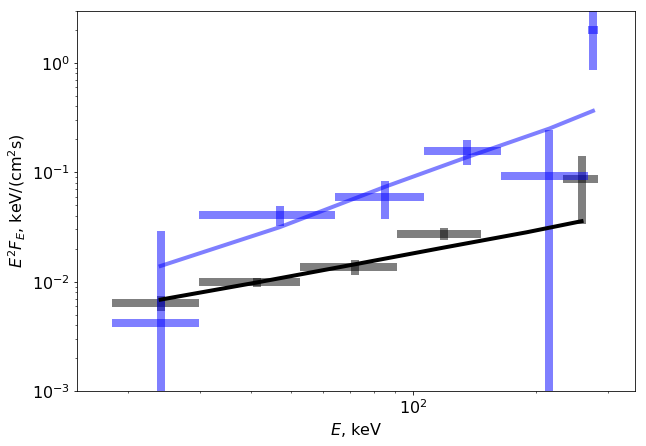

In [47]:
plt.figure(figsize=(10,7))

spectrum=np.genfromtxt(name+'_spectrum_osa10.txt',skip_header=3)
en=spectrum[:,0]
en_err=spectrum[:,1]
fl=spectrum[:,2]
fl_err=spectrum[:,3]
mo=spectrum[:,4]
plt.errorbar(en,fl,xerr=en_err,yerr=fl_err,linestyle='none',linewidth=8,color='black',alpha=0.5)
plt.plot(en,mo,color='black',linewidth=4)


spectrum=np.genfromtxt(name+'_flare_spectrum_osa10.txt',skip_header=3)
en=spectrum[:,0]
en_err=spectrum[:,1]
fl=spectrum[:,2]
fl_err=spectrum[:,3]
mo=spectrum[:,4]
plt.errorbar(en,fl,xerr=en_err,yerr=fl_err,linestyle='none',linewidth=8,color='blue',alpha=0.5)
plt.plot(en,mo,color='blue',linewidth=4,alpha=0.5)


plt.tick_params(axis='both', which='major', labelsize=16)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1.e-3,3.e0)
plt.xlim(15,350)
plt.xlabel('$E$, keV',fontsize=16)
plt.ylabel('$E^2F_E$, keV/(cm$^2$s)',fontsize=16)
plt.savefig(name+'_spectra.pdf',format='pdf',dpi=100)




In [25]:
spectrum_3C279=name+'_spectrum.pdf'